In [1]:
import sys
!{sys.executable} -m pip install pandas
!{sys.executable} -m pip install ipympl
!{sys.executable} -m pip install scipy

DEPRECATION: Configuring installation scheme with distutils config files is deprecated and will no longer work in the near future. If you are using a Homebrew or Linuxbrew Python, please see discussion at https://github.com/Homebrew/homebrew-core/issues/76621
DEPRECATION: Configuring installation scheme with distutils config files is deprecated and will no longer work in the near future. If you are using a Homebrew or Linuxbrew Python, please see discussion at https://github.com/Homebrew/homebrew-core/issues/76621

[notice] A new release of pip available: 22.3.1 -> 23.1.2
[notice] To update, run: python3.9 -m pip install --upgrade pip
DEPRECATION: Configuring installation scheme with distutils config files is deprecated and will no longer work in the near future. If you are using a Homebrew or Linuxbrew Python, please see discussion at https://github.com/Homebrew/homebrew-core/issues/76621
DEPRECATION: Configuring installation scheme with distutils config files is deprecated and will n

DEPRECATION: Configuring installation scheme with distutils config files is deprecated and will no longer work in the near future. If you are using a Homebrew or Linuxbrew Python, please see discussion at https://github.com/Homebrew/homebrew-core/issues/76621
DEPRECATION: Configuring installation scheme with distutils config files is deprecated and will no longer work in the near future. If you are using a Homebrew or Linuxbrew Python, please see discussion at https://github.com/Homebrew/homebrew-core/issues/76621

[notice] A new release of pip available: 22.3.1 -> 23.1.2
[notice] To update, run: python3.9 -m pip install --upgrade pip


In [2]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation
import pandas as pd
from mpl_toolkits.mplot3d import Axes3D
from ast import literal_eval
import ast
from scipy.stats.stats import pearsonr



/var/folders/kj/n8wndqjj3r38dm4f8dqqrw7h0000gn/T/ipykernel_62481/2594389938.py:8: DeprecationWarning: Please use `pearsonr` from the `scipy.stats` namespace, the `scipy.stats.stats` namespace is deprecated.
  from scipy.stats.stats import pearsonr


In [3]:
# manually remove " using search and replace. Add " to the ends only.
df = pd.read_csv("1682011820.8691561_tresh_20phi_24thet_27.csv")

In [4]:
#df.head(1)
test = df.iloc[110] #36
anim = False
# Target has the main array. This specific measurement had super low resolution on the x coordinates. 
# This is why there are only 6 [[ arrays in every [[[ array.
# timestamp = 1 dimension
# The # shown in the array is the intensity.  = 2nd dimension
# 31 elements in the innermost array = either z or y axis
# 46 arrays in every [[ array = either z or y axis
# 6 [[ arrays in every [[[ array = x axis
# The actual axes don't matter right now as long as something is graphed in a 3d graph.

# Note that jupyternotebook will crash if asked to print something too big. 
# Pandas will try to avoid it by cutting off data like below, but other libraries won't.

# We can try graphing a single timestamp initially. 
# I have some 3D graphing I did on previous data that should be able to
# help out a lot w/ animating through time later.

# https://stackoverflow.com/questions/66327451/easiest-way-to-split-2d-numpy-array-in-to-two-1d-arrays 
# is a very promising start I think. It's just hard to think about 4D arrays. 

# coordData = test['target']


In [5]:
# There is also the issue of pandas loading the csv's data as a string
# Loading it as an array makes the data near unreadable, but conversion seems to be super long and annoying
# https://stackoverflow.com/questions/59619773/read-string-representation-of-2d-array-from-csv-column-into-a-2d-numpy-array
def update(num, plotArray, lines): # what if we make lines an array of line?
    j = 2
    for line in lines:
        if num==0:
            num = 1
        line.set_data(plotArray.iloc[:,j][:num], plotArray.iloc[:,j+1][:num])
        line.set_3d_properties(plotArray.iloc[:,j+2][:num])
        j = j + 5


In [6]:
# Extract the target column as a string
# target_str = df['target'].values[0]
timestamp_column = df['timestamp'].values[0]

target_str = test['target']

# Convert the string to a numpy array
target_array = np.array(eval(target_str))

num_lines = 0 

# print()
lines = []


In [7]:
#arr = np.random.rand(1, 5, 3, 4)
arr = target_array
#arr


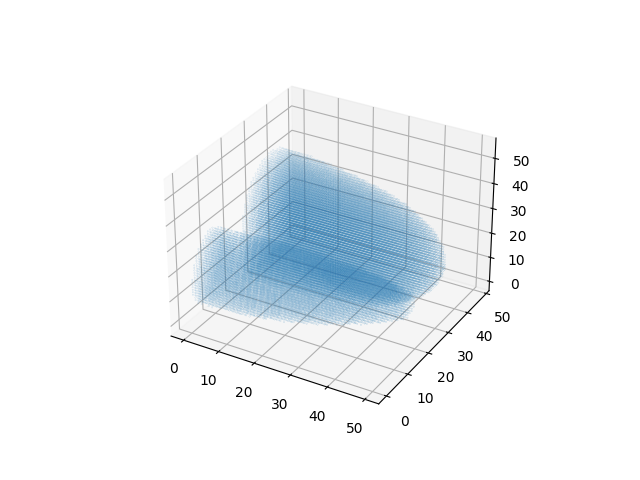

In [8]:
%matplotlib widget

arr = target_array
# Find a way to flatten the 4d array into 4 distinct arrays (inside an array?)
# arr[0][0][0][.714187] = [0];[0];[0];[.714187]
# arr[0][0][1][0.25170079] = [0,1or0];[0,0];[0,1or0];[.2517007]

# We'd need to create 3 more arrays that match the dimensions before flattening.
dimX = arr[0][0].size
dimY = arr[0].size/dimX
dimZ = (arr.size/dimY)/dimX
# 51, 49, 55

# 24, 12, 4.
# X axis = 4
# Y axis = 3
# Z axis = 2

# One array increases every time and resets every 4
# one array increases every time the other hits 3, aka every 4 #s
# one array increases every time the other hits 2, aka every 12 #s

# is there a numpy function that does this efficiently?
# 0-50. 
# 0-50 added on Y times?
xArr = np.arange(0,dimX,1) #baseArr 0, dimX, 1 # [0, 1, 2, 3, 4,... ,maxX] [0,0,0,5][0,0,1,7][0,0,0,12]
baseArr = np.arange(0,dimX,1)
for x in range(int(arr.size/dimX)-1): # baseSize/dimX
    xArr = np.append(xArr,baseArr)


yArr = np.arange(0,dimY,1) #baseArr 0, dimY, 1
yArr = np.repeat(yArr, dimX) # dimX
baseArr = yArr
for x in range(int(arr.size/(dimX*dimY))-1): # (baseSize/(dimX*dimY))-1
    yArr = np.append(yArr,baseArr)
# 0,1,2,3,0
# 0,0,0,0,1

zArr = np.arange(0,dimZ,1) # zArr 0, dimZ, 1
zArr = np.repeat(zArr, dimX*dimY) # dimX * dimY

# arr[0,0,0,0]

# flattening the array would give us the intensity array

arr.flatten()

#print(dimX, dimY, dimZ, xArr, yArr, zArr, arr)
#print(xArr.size, yArr.size, zArr.size, arr.size)

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

arr = arr/10000

img = ax.scatter(xArr, yArr, zArr, s = arr)
plt.show()

In [9]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation
import pandas as pd
from mpl_toolkits.mplot3d import Axes3D
from ast import literal_eval
import ast
import time

def flatMakerX(arr, dimX, dimY, dimZ):
    xArr = np.arange(0,dimX,1) #baseArr 0, dimX, 1 # [0, 1, 2, 3, 4,... ,maxX] [0,0,0,5][0,0,1,7][0,0,0,12]
    baseArr = np.arange(0,dimX,1)
    for x in range(int(arra.size/dimX)-1): # baseSize/dimX
        xArr = np.append(xArr,baseArr)
    return xArr

def flatMakerY(arr, dimX, dimY, dimZ):
    yArr = np.arange(0,dimY,1) #baseArr 0, dimY, 1
    yArr = np.repeat(yArr, dimX) # dimX
    baseArr = yArr
    for x in range(int(arra.size/(dimX*dimY))-1): # (baseSize/(dimX*dimY))-1
        yArr = np.append(yArr,baseArr)
    # 0,1,2,3,0
    # 0,0,0,0,1
    return yArr

def flatMakerZ(arr, dimX, dimY, dimZ):
    zArr = np.arange(0,dimZ,1) # zArr 0, dimZ, 1
    zArr = np.repeat(zArr, dimX*dimY) # dimX * dimY
    return zArr
    # arr[0,0,0,0]

def flatMakerI(arr):
    arra = np.array(eval(arr))
    # flattening the array would give us the intensity array
    arra = arra.flatten()
    return arra
#arr = np.random.rand(1, 5, 3, 4)
#arr = target_array
#arr


# manually remove " using search and replace. Add " to the ends only.
df = pd.read_csv("1682361999.346003_20_tresh_20phi_15thet_30_noise_openClose_wave)x2.csv") # GREAT
# df = pd.read_csv("1682362241.8210464_30_tresh_20phi_15thet_30.csv") # WORKS
# df = pd.read_csv("1682362499.9322648_40_tresh_20phi_15thet_30.csv") # EMPTY?
# df = pd.read_csv("1682362704.7286098_50_tresh_20phi_15thet_30.csv") #100% EMPTY T>T

anim = True
# df = pd.DataFrame()
# df['timestamp'] = [1,2,3,4,5]
# df['target'] = ["[[[0,1,2,5],[10,2,3,4],[1,20,3,4],[1,2,0,0]],[[0,10,2,3],[1,2,30,4],[1,2,3,40],[10,2,0,0]]]","[[[0,1,20,3],[1,2,30,4],[1,20,3,4],[10,2,0,0]],[[0,10,2,3],[10,2,3,4],[10,2,3,4],[1,20,0,0]]]","[[[0,1,2,3],[1,2,3,4],[1,2,3,4],[1,2,0,0]],[[0,1,2,3],[1,2,3,4],[1,2,3,4],[1,2,0,0]]]","[[[0,1,2,3],[1,2,3,4],[1,2,3,4],[1,2,0,0]],[[0,1,2,3],[1,2,3,4],[1,2,3,4],[1,2,0,0]]]","[[[0,1,2,3],[1,2,3,4],[1,2,3,4],[1,2,0,0]],[[0,1,2,3],[1,2,3,4],[1,2,3,4],[1,2,0,0]]]"]


# Extract the target column as a string
# target_str = df['target'].values[0]
timestamp_column = df['timestamp']
pd.to_numeric(timestamp_column)
time_start = timestamp_column[0]
timestamp_column = timestamp_column.subtract(time_start)
print(timestamp_column)
data_column = df['target']
# pd.to_numeric(data_column)


num_lines = 0 

# print()
lines = []
print("Beginning the lambda things. Will take a while.")
finalDf = pd.DataFrame()
ff = data_column.iloc[0] # TODO: Switch to 0

arra = np.array(eval(ff))
dimX = arra[0][0].size
dimY = arra[0].size/dimX
dimZ = (arra.size/dimY)/dimX


finalDf['xArr'] = data_column.apply(lambda x: flatMakerX(x, dimX, dimY, dimZ))
finalDf['yArr'] = data_column.apply(lambda x: flatMakerY(x, dimX, dimY, dimZ))
finalDf['zArr'] = data_column.apply(lambda x: flatMakerZ(x, dimX, dimY, dimZ))
finalDf['iArr'] = data_column.apply(lambda x: flatMakerI(x))


0        0.000000
1        0.312418
2        0.609197
3        0.906033
4        1.234049
          ...    
546    173.164809
547    173.461609
548    173.758413
549    174.117671
550    174.430130
Name: timestamp, Length: 551, dtype: float64
Beginning the lambda things. Will take a while.


In [11]:
backUp = finalDf

In [12]:
# eliminate frames where the data didn't get anything.
finalDf = finalDf[finalDf['iArr'].apply(lambda x: True if x.sum() > 0 else False)]
print("Finished the lambda things. rest should be fast. If it isn't it migh")
finalDf['iArr'] = finalDf['iArr']/5000

finalDf.head()

Finished the lambda things. rest should be fast. If it isn't it migh


/var/folders/kj/n8wndqjj3r38dm4f8dqqrw7h0000gn/T/ipykernel_62481/2138138289.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  finalDf['iArr'] = finalDf['iArr']/5000


,xArr,yArr,zArr,iArr
70,"[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
82,"[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
101,"[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
103,"[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
106,"[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."


In [13]:
matrix=finalDf['iArr'].iloc[168:173]
matrix

418    [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...
419    [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...
420    [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...
421    [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...
422    [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...
Name: iArr, dtype: object

In [14]:
matrix1=finalDf['iArr'].iloc[48:86]
type(matrix1)
matrix2=finalDf['iArr'].iloc[168:206]


In [15]:
npArr =finalDf['iArr'].iloc[48]
matrix1=finalDf['iArr'].iloc[49:86].apply(lambda x: np.append(npArr,x))
npArr2 = finalDf['iArr'].iloc[168]
matrix2=finalDf['iArr'].iloc[169:206].apply(lambda x: np.append(npArr2,x))


# .apply(lambda x: np.append(finalNp,x))
# .apply(lambda x: np.append(finalNp,x))

In [16]:
pearsonr(npArr, npArr2)

PearsonRResult(statistic=0.7317967670566758, pvalue=0.0)

In [ ]:
pearsonr(matrix1, matrix2)

In [ ]:
pearsonr(matrix1, matrix2)

In [ ]:
out2

In [ ]:
trueArr = out1[2] == out2[2]

In [ ]:
np.all(trueArr)
